## INTRODUCTION
Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operatoin in August 2013 as Bay Area Bike Share, the Ford GoBike System currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017 the system officiall launched as Gord GoBIke in partnership with FOrd Motor Company. The System is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berekely, EmeryVille and San Jose. The System is OPerated by Motivate in a Partnership with the Metropolitan Transporttaion Commission and the  Bay Area Air Quality District. Ford GoBike is the first regional and large-sclae bicycle sharing system deployed in california and on the West Coast of the United States

## DATA WRANGLING

### Gathering Data

In [6]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [7]:
#import the data
data = pd.read_csv('201902-fordgobike-tripdata.csv')
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### Assessing the data Visually

In [8]:
data.sample(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
104626,399,2019-02-14 08:20:44.6870,2019-02-14 08:27:24.1550,162.0,Franklin St at 9th St,37.800516,-122.272080,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,4501,Subscriber,1963.0,Female,No
97374,435,2019-02-15 09:00:55.0910,2019-02-15 09:08:10.8990,24.0,Spear St at Folsom St,37.789677,-122.390428,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,4449,Subscriber,1985.0,Male,No
61920,508,2019-02-20 17:20:01.0280,2019-02-20 17:28:29.2440,26.0,1st St at Folsom St,37.787290,-122.394380,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,6081,Subscriber,1975.0,Male,No
7281,766,2019-02-28 09:07:55.7610,2019-02-28 09:20:42.4780,86.0,Market St at Dolores St,37.769305,-122.426826,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,6293,Subscriber,1985.0,Male,No
163385,882,2019-02-05 09:14:03.4360,2019-02-05 09:28:45.5560,124.0,19th St at Florida St,37.760447,-122.410807,81.0,Berry St at 4th St,37.775880,-122.393170,3258,Subscriber,1993.0,Female,No
103870,420,2019-02-14 09:58:58.9440,2019-02-14 10:05:59.9200,27.0,Beale St at Harrison St,37.788059,-122.391865,81.0,Berry St at 4th St,37.775880,-122.393170,5923,Subscriber,1992.0,Female,No
8784,399,2019-02-28 08:06:11.8650,2019-02-28 08:12:50.8890,189.0,Genoa St at 55th St,37.839649,-122.271756,176.0,MacArthur BART Station,37.828410,-122.266315,1429,Subscriber,1989.0,Male,No
97855,487,2019-02-15 08:31:38.6760,2019-02-15 08:39:45.8680,61.0,Howard St at 8th St,37.776513,-122.411306,112.0,Harrison St at 17th St,37.763847,-122.413004,1884,Subscriber,1990.0,Male,No
34076,657,2019-02-24 09:16:09.1630,2019-02-24 09:27:06.1670,385.0,Woolsey St at Sacramento St,37.850578,-122.278175,246.0,Berkeley Civic Center,37.869060,-122.270556,1554,Subscriber,1993.0,Male,No
66526,427,2019-02-20 08:42:15.7250,2019-02-20 08:49:22.7710,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,9.0,Broadway at Battery St,37.798572,-122.400869,901,Subscriber,1968.0,Male,No


In [9]:
#Assess the dataset programatically
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [10]:
#check if duplicates exists
data.duplicated().sum()

0

In [11]:
#View descriptive Statistic of the dataFrame
data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [12]:
data.shape

(183412, 16)

#### Quality Issues :

* start_time and end_time are objects not timestamps
* user type, gender and bike_share_for_all_trip can be set to category
* bike_id, start_session_id, end_station_is can be set to object
* we can calculate the age of the user
* we can improve the quality of the data with more columns from the time such as month, daya, hourm week
* we can calculate the distance for rides between stations

#### Cleaning Data

In [13]:
data_clean = data.copy()

##### Define:
`start_time` and `end_time` are objects not timestamps then convert the datatype to datetime
`user type`, `member_gender` and `bike_share_for_all_trip` will be converted to the datatype category
`bike_id`, `start_session_id`, `end_station_is` will be converted to the object datatype

In [14]:
#change datatypes to datetime
data_clean['start_time'] = pd.to_datetime(data_clean['start_time'])
data_clean['end_time'] = pd.to_datetime(data_clean['end_time'])

In [15]:
#change the datatype to category
data_clean['user_type'] = data_clean['user_type'].astype('category')
data_clean['member_gender'] = data_clean['member_gender'].astype('category')
data_clean['bike_share_for_all_trip'] = data_clean['bike_share_for_all_trip'].astype('category')

In [16]:
#change the datatype to object
data_clean['bike_id'] = data_clean['bike_id'].astype('str')
data_clean['start_station_id'] = data_clean['start_station_id'].astype('str') 
data_clean['end_station_id'] = data_clean['end_station_id'].astype('str')

##### Test

In [17]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

#### Define
Calculate the age of the member

#### Code

In [18]:
#substract the birth year from the current year(2019 from the dataset)
data_clean['member_age'] = 2019 - data_clean['member_birth_year']

#### Test

In [19]:
data_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45.0


#### Define
Enhance dataset with new date related fields

#### Code

In [20]:
data_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45.0


#### Define:
Enhance dataset with new date related fields

#### Code:

In [21]:
# etxract start time month name
data_clean['start_time_month_name'] = data_clean['start_time'].dt.strftime('%B')

In [22]:
#extract start time month number
data_clean['start_time_month'] = data_clean['start_time'].dt.month.astype(int)

In [23]:
#extract start time day
data_clean['start_time_weekday'] = data_clean['start_time'].dt.strftime('%a')

In [24]:
#extract start time day
data_clean['start_time_day'] = data_clean['start_time'].dt.day.astype(int)

In [25]:
#extract start time hour
data_clean['start_time_hour'] = data_clean['start_time'].dt.hour

In [26]:
data_clean['start_time_month'].unique()

array([2])

#### Test

In [27]:
data_clean.info(verbose =True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

In [28]:
#set visualization style
sns.set_style('whitegrid')
sns.set_context("talk")

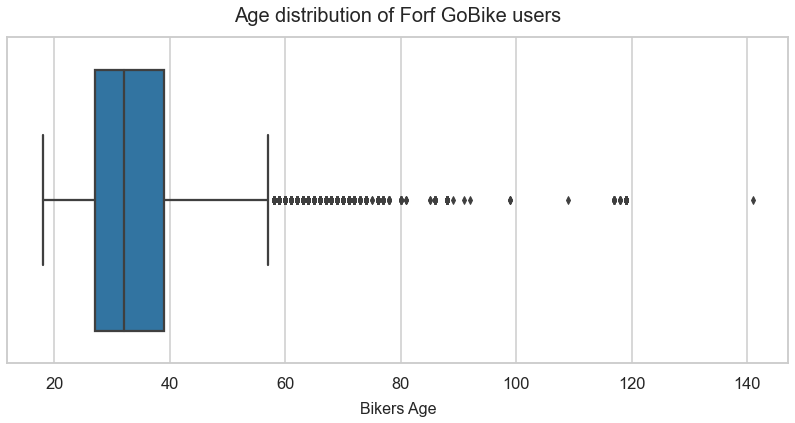

In [29]:
# code for the age boxplot

plt.figure(figsize = [14,6])
base_color = sns.color_palette()[0]
sns.boxplot(data = data_clean, x = 'member_age', color = base_color);
plt.title("Age distribution of Forf GoBike users", fontsize = 20, y=1.03)
plt.xlabel('Bikers Age', fontsize =16, labelpad = 10)
plt.savefig('_images/image01.png');

Here is the age distribution of users from ages 18 to 56 takes 95% of the users. There were users more than 100 years old. So, we can remove users more than 60 years old

In [30]:
#checking statistics for age
data_clean.member_age.describe(percentiles = [.95])

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
50%          32.000000
95%          55.000000
max         141.000000
Name: member_age, dtype: float64

The mean age of riders from descriptive statistics is 34 years

#### Define

Remove age outliers. From the quality issues described aboved , the customers with the birth year before 1900 thus customers with age above 100 years. As 95% of the users are below 55. I am going to kees users below 60

In [31]:
data_clean = data_clean[data_clean['member_age'] <60]

In [32]:
data_clean.drop('member_birth_year', axis =1, inplace = True)

In [33]:
#change age and birth year and integer
data_clean.member_age = data_clean.member_age.astype(int)

#### Test

In [34]:
sum(data_clean['member_age']>60)

0

In [35]:
data_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age,start_time_month_name,start_time_month,start_time_weekday,start_time_day,start_time_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,Male,No,35,February,2,Thu,28,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,Male,No,47,February,2,Thu,28,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,Other,No,30,February,2,Thu,28,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,Male,Yes,45,February,2,Thu,28,23
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,3803,Subscriber,Female,No,36,February,2,Thu,28,23


In [36]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170993 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             170993 non-null  int64         
 1   start_time               170993 non-null  datetime64[ns]
 2   end_time                 170993 non-null  datetime64[ns]
 3   start_station_id         170993 non-null  object        
 4   start_station_name       170798 non-null  object        
 5   start_station_latitude   170993 non-null  float64       
 6   start_station_longitude  170993 non-null  float64       
 7   end_station_id           170993 non-null  object        
 8   end_station_name         170798 non-null  object        
 9   end_station_latitude     170993 non-null  float64       
 10  end_station_longitude    170993 non-null  float64       
 11  bike_id                  170993 non-null  object        
 12  user_type       

In [37]:
data_clean.to_csv('clean_data.csv', index = False)

There are 170993 rides in the dataset with features like bike_id, user_type, member_age, start_station_name etc. Most variables are numeric in the dataset. The dataset contained features about:

* trip duration: start/end time, how long the trip took in seconds
* stations: start/end station, name, geolocation (latitude/longitude)
* anonymized customer data: gender, birth date and user type
* rented bikes: bike id

The dataset was further enhanced with features that I may find neccessary to perform interesting analysis:

* rental time: month, day, hour of the day, weekday (both for start and end date)
* customer: age

#### List the main feature(s) of interest in your dataset? ####

I'm most interested in figuring out when and where bikes are high in demand (during the day/weekday/month). 
Moreover which age range and gender uses the service the most and if the service is mostly used by members or casual riders.

I expect that the start time will be most exploited in my analysis as well as customer related data. I expect that location and datetime will have the strongest effect on bike demand.

### Univariate Exploration ###

I'll start by looking at weekday trend of number of bike rentals and distribution of hours of the day I will also explore the duration of trips

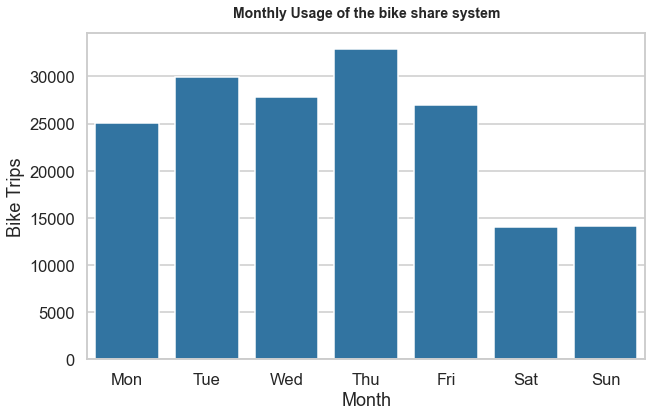

In [38]:
# monthly usage of the bike sharing system
plt.figure(figsize = [10,6])
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.countplot(data = data_clean, x = 'start_time_weekday', color = base_color, order = weekday)
g.set(xlabel = 'Month', ylabel='Bike Trips')
plt.title('Monthly Usage of the bike share system', y = 1.03, fontsize = 14, fontweight = 'semibold')
plt.savefig('_images/image002.png')

The bike share system is mainly used during weekdays, with Tuesday - Thursday as the most popular days for bike rides. The system is most probably used as a daily work/school commute

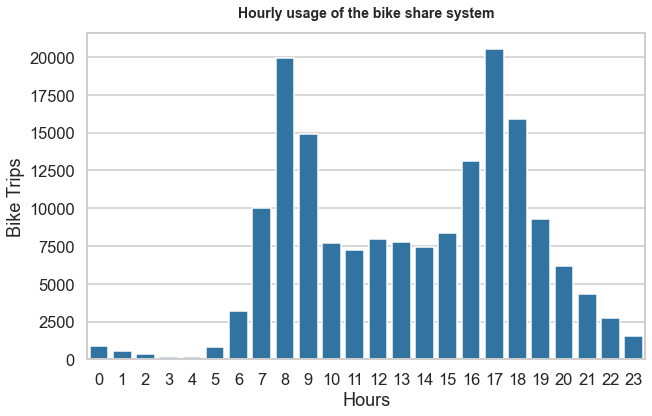

In [39]:
plt.figure(figsize = [10,6])
g = sns.countplot(data = data_clean, x = 'start_time_hour', color = base_color)
g.set(xlabel = 'Hours', ylabel = "Bike Trips")
plt.title('Hourly usage of the bike share system', y = 1.03, fontsize =14, fontweight = 'semibold')
plt.savefig('_images/image03.png');

The hourly distribution is bimodal, the system is used mainly 8-9am and 5-6pm when people are going to work and coming back fro work

In [40]:
#let's now check distribution per user type
data_clean.describe()['duration_sec']

count    170993.000000
mean        703.282386
std        1656.667937
min          61.000000
25%         323.000000
50%         509.000000
75%         787.000000
max       84548.000000
Name: duration_sec, dtype: float64

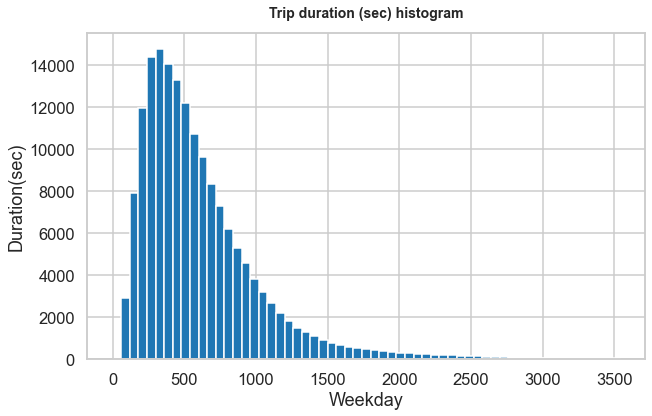

In [41]:
plt.figure(figsize = [10,6])
bin_edges = np.arange(0,3600,60)
plt.hist(data = data_clean, x='duration_sec', bins = bin_edges)
plt.title("Trip duration (sec) histogram", y=1.03, fontsize = 14, fontweight = 'semibold')
plt.xlabel('Weekday')
plt.ylabel("Duration(sec)")
plt.savefig('_images/image04.png');

Looking at the histogram, we can see that trip durations are no longer than 30 min (1800 sec) and usually last 6 to 15 min

#### How did the features(s) of interest vary with other feature in the dataset?
* The way the system works: single trips and 24h or 72h access pass are free of additional charge for trips up to 30 min, otherwise you pay extra $3 for additional 15 min. Only the monthly pass offers free of charge 45 min rides.
* The way the system is used: as is looks like people use the system for commuting, they trips are usually short in time probably due to the closeness of their homes to workplace/school.

#### Did you observe any interesting relationships between the other features? ####
No

### Bivariate Exploration ###

In [42]:
customer = data_clean.query('user_type =="Customer"')['bike_id'].count()
subscriber = data_clean.query('user_type == "Subscriber"')['bike_id'].count()

customer_proportion = customer / data_clean['bike_id'].count()
subcriber_proportion = subscriber /data_clean['bike_id'].count()

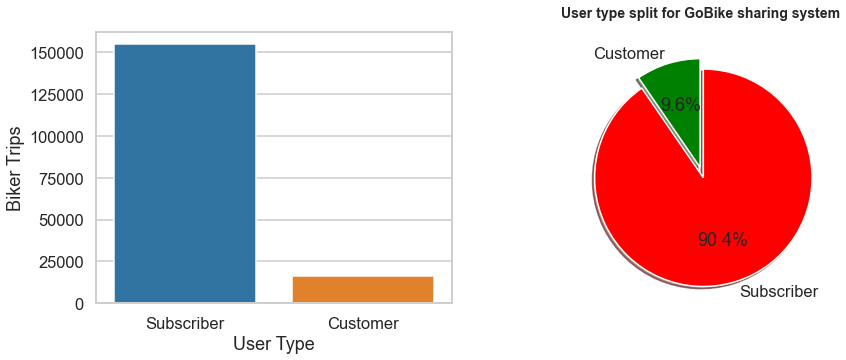

In [43]:
plt.figure(figsize = [14,5])

#code for the bar chart
plt.subplot(1,2,1)

g = sns.countplot(data = data_clean, x='user_type',  order = data_clean.user_type.value_counts().index)
g.set_xlabel("User Type")
g.set_ylabel("Biker Trips")

#code for the pie chart
plt.subplot(1,2,2)

labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subcriber_proportion]
colors = ['green', 'red']
explode = (0,0.1)

plt.pie(sizes, explode = explode, labels = labels, colors = colors,
       autopct = "%1.1f%%", shadow=True, startangle = 90)

plt.title('equal')
plt.title("User type split for GoBike sharing system", y =1.03, fontsize = 14, fontweight = 'semibold')
plt.savefig('_images/image05.png')

The bike sharing system is mainly used by subscribers (88.6%) than occassional riders (11.4%)

Next lets check the renting trends per each user type

In [44]:
data_clean['user_type'].head()

0      Customer
2      Customer
3    Subscriber
4    Subscriber
6    Subscriber
Name: user_type, dtype: category
Categories (2, object): ['Customer', 'Subscriber']

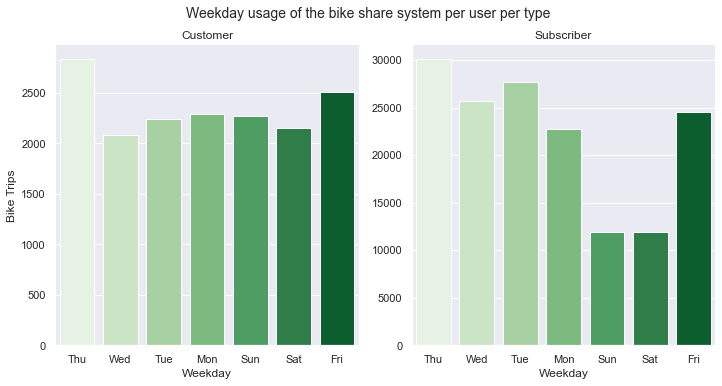

In [45]:
# monthly usage of the bike sharing system per user type
sns.set(rc = {'figure.figsize':(15,8)})
g = sns.catplot(data=data_clean, x = 'start_time_weekday', col = "user_type", kind = 'count', sharey = False, palette = "Greens")
g.set_axis_labels("Weekday", "Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle("Weekday usage of the bike share system per user per type", y  =1.03, fontsize = 14);
plt.savefig('_images/image06.png');

There is a different trend on which days customers and subscribers rent bikes. As mentioned above customers are most probably occasional riders and tourist who use the bike sharing system on holiday or weekend trips. On the other hand, subscribers are most probably daily work/school commuters who use the system within a week. 


Now, lets check when within a day bikes are high in demand.

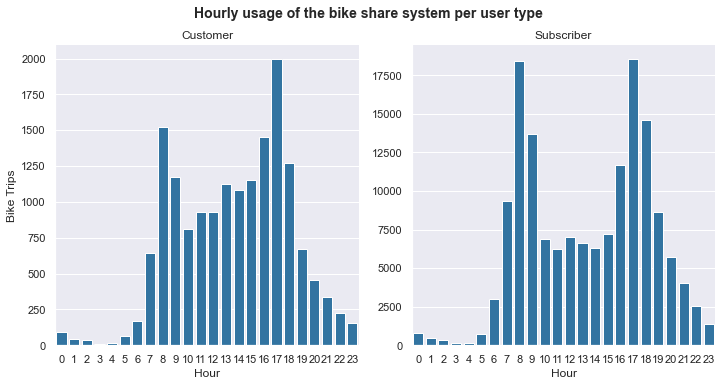

In [46]:
# hourly useage of the bike sharing system per user type
sns.set(rc={'figure.figsize':(15,8)})
g = sns.catplot(data=data_clean, x='start_time_hour', col="user_type", kind='count', sharey = False, color = base_color)
g.set_axis_labels("Hour", "Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');
plt.savefig('_images/image07.png');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


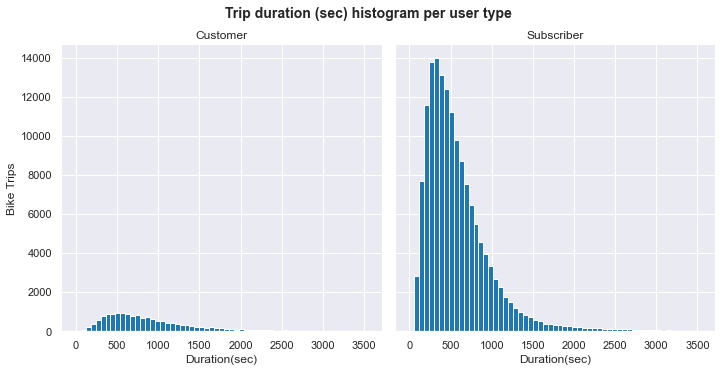

In [47]:
#code for the (histogram) duration (Sec) distribution per user

sns.set(rc = {'figure.figsize': (15,8)})
g = sns.FacetGrid(data_clean, col = "user_type", margin_titles = True, size = 5)
bin_edges = np.arange(0, 3600, 60)
g.map(plt.hist, "duration_sec", color= base_color, bins = bin_edges)
g.set_axis_labels("Duration(sec)", "Bike Trips")
g.set_titles(col_template = "{col_name}")
g.fig.suptitle('Trip duration (sec) histogram per user type', y = 1.03, fontsize=14, fontweight = 'semibold')
plt.savefig('_images/image08')

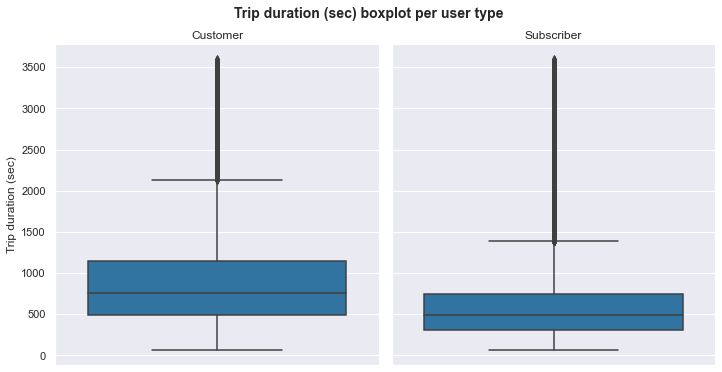

In [48]:
#code for the (boxplot) duration (sec) distribution per user type

sns.set(rc = {'figure.figsize':(15,8)})
data = data_clean.query('duration_sec < 3600')
g = sns.catplot(data  =data, y='duration_sec', col = 'user_type', kind = 'box', color = base_color)
g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Trip duration (sec)")
g.fig.suptitle('Trip duration (sec) boxplot per user type', y = 1.03, fontsize = 14, fontweight = 'semibold');
plt.savefig('_images/image09.png');

Looking at both charts (histograms and box plots), we can see that trip durations are longer for customers (9 to 23 minutes) than for subscribers (7 to 13 minutes). This can probably be explained by the fact that subscribers are mainly commuters who take short trips to work/school rather than longer trips around the Bay Area.

#### How did the features(s) of interest vary with other feature in the dataset?

Adding the user type to the analysis depicted different usage behaviours between customers and subscribers. As mentioned above customers are casual riders, most probably tourists who rent bikes more often during weekends than weekdays and they rent bikes more often within the day rather than around commute hours (8-9am and 5-6pm).  They rent bikes more often during weekdays than weekends and mainly around the time they go and go back from work or school (8-9am and 5-6pm).

#### Did you observe any interesting relationships between the other features? ####

There is a difference in the trip duration between customers and subscribers. Customers trips are usually longer than for subscribers, most probably due to the fact they prefer bike rides around weekends in summertime, what encourages longer trips around the area. Subscribers on the other hand use the system mainly for commute purposes so they rather prefer quick rides to and from work/school.

### Multivariate Exploration ###

I will further explore the dataset by adding gender to the customer typeand check rh hourly distibution of bike rides during weekdays for customers and subcribers

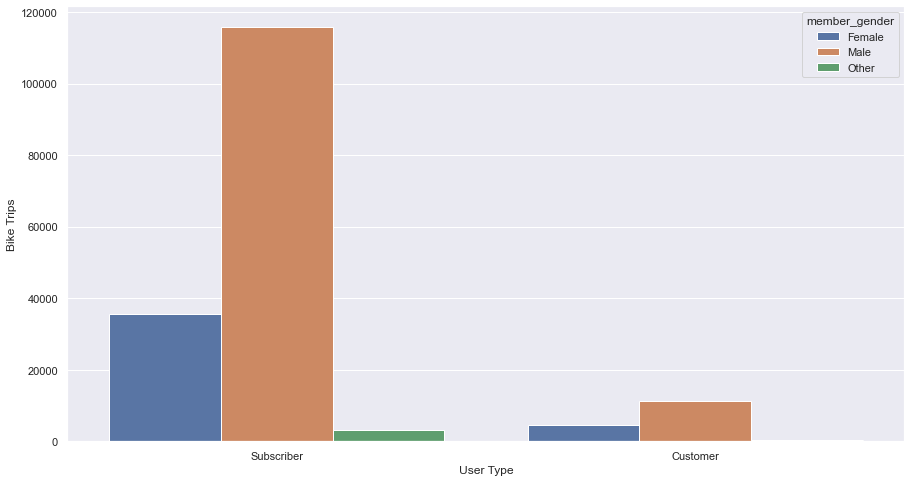

In [49]:
plt.figure(figsize  = [15,8])

#code for the bar chart

g = sns.countplot(data= data_clean, x = "user_type", hue = "member_gender", order = data_clean.user_type.value_counts().index)
g.set_xlabel("User Type")
g.set_ylabel("Bike Trips")
plt.savefig('_images/image10.png')

In general, males are using the system more often than females and others (the registration system allows you to choose 'Other' as a gender). However, the ratio is much smaller between males and females for customers (more ore less 2:1) than for subscribers (3:1). 

Let's explore if gender affects the way the bike system is used within a year, weekdays and hours of the day.`

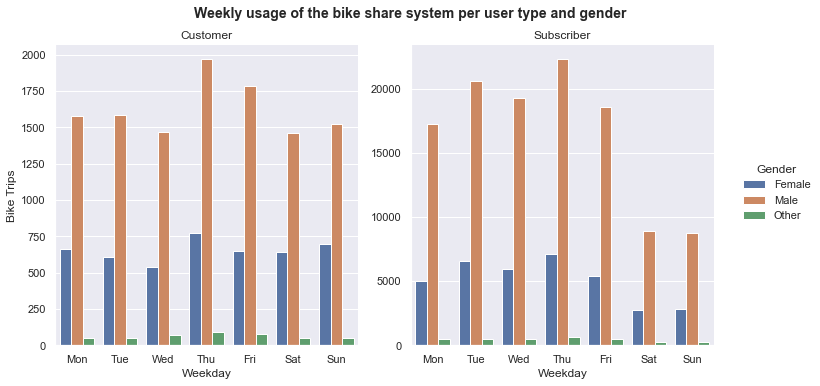

In [50]:
# weekday usege of the bike sharing system per user type and gender
sns.set(rc={'figure.figsize':(15,8)})

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=data_clean, x='start_time_weekday', col="user_type", hue='member_gender', kind='count', sharey = False,
                order = weekday)
g.set_axis_labels("Weekday", "Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the bike share system per user type and gender', y=1.03, fontsize=14, fontweight='semibold')
plt.savefig('_images/image11.png');

As in the previous section, the trend is very similar for males and females: customers use the system more often during weekends than within a week; subscribers use the system mainly within a week.

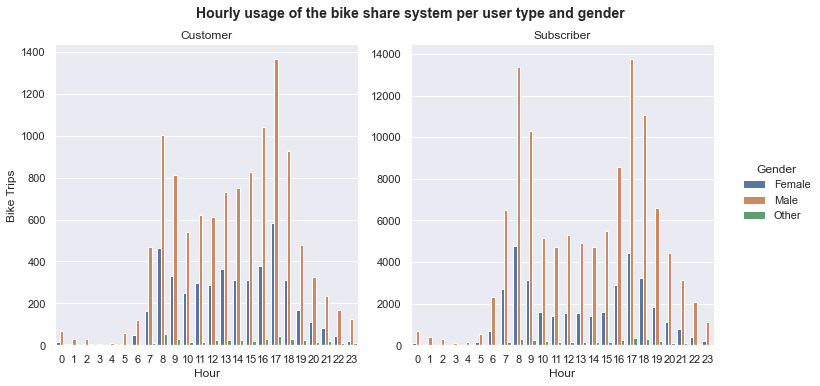

In [51]:
# hourly useage of the bike sharing system per user type and gender
sns.set(rc={'figure.figsize':(15,9)})

g = sns.catplot(data=data_clean, x='start_time_hour', col="user_type", hue='member_gender', kind='count', sharey = False)
g.set_axis_labels("Hour", "Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the bike share system per user type and gender', y=1.03, fontsize=14, fontweight='semibold')
plt.savefig('_images/image12.png');

During the day, both males and females use the system the same way: customers use bikes mainly between 8 am - 7 pm; subscribers on the other side use the system at around 8-9am and 5-6pm when they go and come back from work.

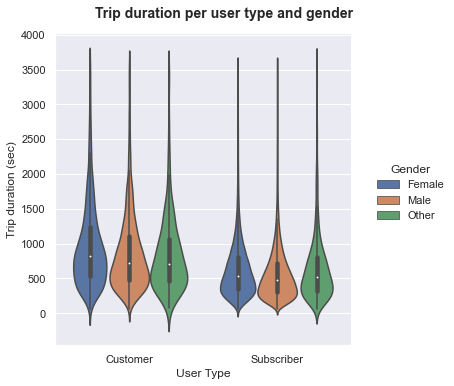

In [52]:
# code for the (violinplot) duration (sec) distribution per user type and gender
sns.set(rc={'figure.figsize':(15,10)})
g = sns.catplot(data=data, x='user_type', y="duration_sec", hue="member_gender", kind="violin")

g.set_axis_labels("User Type", "Trip duration (sec)")
g._legend.set_title('Gender')
g.fig.suptitle('Trip duration per user type and gender', y=1.03, fontsize=14, fontweight='semibold')
plt.savefig('_images/image13.png');

we can observe that in both cases, females take longer trips (measured in time) than males and other. The difference is more visible for customers (~13 min for males and other vs ~15 for females) than for subscribers (the difference is quite small).

In [53]:
def label(x,y,t):
    """
    x (str): x-axis title
    y (str): y axis title
    t(str): title of the string
    
    Returns none
    """
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)

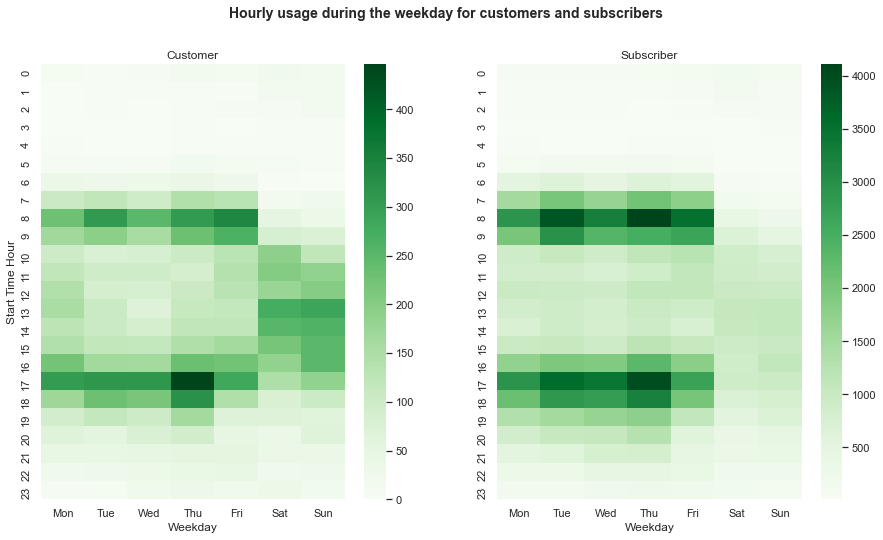

In [54]:
# Setting the weekday order
data_clean['start_time_weekday'] = pd.Categorical(data_clean['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(15,8))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=14, fontweight='semibold')

# heatmap for customers
plt.subplot(1, 2, 1)
data_customer = data_clean.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
data_customer = data_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(data_customer, cmap="Greens")

label('Weekday', 'Start Time Hour', "Customer")

# heatmap for subscribers
plt.subplot(1, 2, 2)
data_subscriber = data_clean.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
data_subscriber = data_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(data_subscriber, cmap="Greens")

label('Weekday', '', "Subscriber")

plt.savefig('_images/image14.png');

The plot perfectly summarizes in one place the diffrent trends for customers and subscribers

#### How did the features(s) of interest very with other feature in the dataset?

Customers use the bike sharing system more often on weekends: on weekdays most bike rides hapen around 8-9am and 5-6pm with the peak on Fridays around 5pm while on
weekends: most bike rides happen between 10am - 8pm with the peak on Saturdays around 2pm.Most bike rides hapen around 8-9am and 5-6pm with the peak on Tuesdays around 8am also bikes are still rented but there is a significant drop in numbers of rented bikes throughout the entire weekends

#### Did you observe any interesting relationships between the other features? ####

In general, males are using the system more often than females and others (the registration system allows you to choose 'Other' as a gender). However, the ratio is much smaller between males and females for customers (more ore less 2:1) than for subscribers (3:1).The difference is more visible for customers (~13 min for males and other vs ~15 for females) than for subscribers (the difference is quite small). 